### To print the elapsed time, first get the start time

In [1]:
import time
from datetime import timedelta

start_time = time.time()

In [2]:
import pandas                         as     pd
import numpy                          as     np
import seaborn                        as     sns
import matplotlib.pyplot              as     plt
import statsmodels.api                as     sm
import sys, os, six

from   sklearn                        import  metrics 
from   sklearn.metrics                import  classification_report
from   sklearn.metrics                import  confusion_matrix
from   sklearn.metrics                import  roc_curve, auc
from   sklearn.model_selection        import  train_test_split, cross_val_score
# !pip install pydotplus ### if not available in the Python Environment
import pydotplus

# !pip install pydot ### if not available in the Python Environment
import pydot

## ! pip install  graphviz  ### if not available in the Python Environment

In [3]:
from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.tree             import _tree

In [4]:
print("\nCurrent working directory %s" %os.getcwd())

folder     =    r'G:\DSE-Capstone\DSE-Online-Jan22'
os.chdir(folder)


Current working directory G:\DSE-Capstone\DSE-Online-Jan22


In [5]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

In [6]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [7]:
def draw_decision_tree(model, X, y, flist, classlist, file_name = 'Tree'):
    
    from sklearn.tree            import export_graphviz
    from six                     import StringIO  
    from IPython.core.pylabtools import figsize
    from IPython.display         import Image
    figsize(12.5, 6)
    import pydot

    #dot_data = StringIO()  
    file_name_dot = file_name + '.dot'
    file_name_png = file_name + '.png'
    
    export_graphviz(model, out_file = file_name_dot, feature_names = flist,\
                    class_names = classlist, filled = True, rounded = True)
    (graph,) = pydot.graph_from_dot_file(file_name_dot)
    graph.write_png(file_name_png)
    return Image(file_name_png)

In [8]:
"""
   Function Name: compare_models

   Description: This **function** compares various algorithms on 
                 1) AUROC 2) Precision, 3) Recall
   
   Input: 1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Training data for target variable



   Output: Model comparison on these metrics 1) AUROC 2) Metrics - Precision, Recall
   
"""
def compare_models(n_splits, random_state, X, Y):  

    ### To compare algorithms
    
    import  matplotlib.pyplot            as      plt
    from    sklearn.model_selection      import  StratifiedKFold
    from    sklearn.model_selection      import  cross_val_score
    from    sklearn.linear_model         import  LogisticRegression
    from    sklearn.tree                 import  DecisionTreeClassifier
    from    sklearn.naive_bayes          import  GaussianNB
    from    sklearn.ensemble             import  RandomForestClassifier
    
    ### Prepare models
    
    models  = []
    models.append(('LR', LogisticRegression(max_iter=10000))) 
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    
    
    ### Evaluate model in turn
    
    scores_req =  ['roc_auc', 'precision', 'recall']
    
    for i in range(len(scores_req)):
        names          =   []
        results        =   []
        scoring        =   scores_req[i]
        print(scoring)
        
        for name, model in models:
            print("\n n_splits %d random_state %d" % (n_splits, random_state))        	
            skf            =   StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
            cv_results     =   cross_val_score(model, X, Y, cv = skf, scoring = scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
        
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        
        fig = plt.figure()
        fig.suptitle(sub_title)
        ax  = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

### ------------------------------------------------------------------------------------------

In [9]:
'''
This function returns a set of rules defined in the Decision Tree which is easy to understand
'''
def tree_to_rules(tree, feature_names, class_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):

        indent = "  " * depth

        if (threshold[node] != -2):

            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")

            if left[node] != -1:

                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")

                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)

                print(indent,"}")

        else:
            if value[node][0,0] > value[node][0,1]:
              classified = class_names[0]
            else:
              classified = class_names[1]
            print(indent,"Class = " + classified)
    recurse(left, right, threshold, features, 0)

### Read data

In [10]:
file_name =  './Output/transformed-data-2022_07_06_10_53_22.csv'

In [11]:
data     =    pd.read_csv(file_name)
n        =    data.shape[0]  # Get the count of records
print("Dataset has %d rows and %d columns" % (data.shape[0], data.shape[1]))

Dataset has 103904 rows and 25 columns


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SR                                 103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Flight_Distance                    103904 non-null  int64  
 4   Inflight_wifi_service              103904 non-null  int64  
 5   Departure/Arrival_time_convenient  103904 non-null  int64  
 6   Ease_of_Online_booking             103904 non-null  int64  
 7   Gate_location                      103904 non-null  int64  
 8   Food_and_drink                     103904 non-null  int64  
 9   Online_boarding                    103904 non-null  int64  
 10  Seat_comfort                       103904 non-null  int64  
 11  Inflight_entertainment             1039

In [13]:
data.columns

Index(['SR', 'id', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_code', 'Customer_Type_code',
       'Type_of_Travel_code', 'Class_code'],
      dtype='object')

In [14]:
factor_var = ['Inflight_wifi_service', 'Departure/Arrival_time_convenient','Ease_of_Online_booking','Gate_location',\
              'Food_and_drink', 'Online_boarding', 'Seat_comfort','Inflight_entertainment','On-board_service',\
              'Leg_room_service','Baggage_handling', 'Checkin_service', 'Inflight_service','Cleanliness',\
              'satisfaction', 'Gender_code', 'Customer_Type_code', 'Type_of_Travel_code', 'Class_code']
###

data[factor_var] = data[factor_var].astype('category')
data.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   SR                                 103904 non-null  int64   
 1   id                                 103904 non-null  int64   
 2   Age                                103904 non-null  int64   
 3   Flight_Distance                    103904 non-null  int64   
 4   Inflight_wifi_service              103904 non-null  category
 5   Departure/Arrival_time_convenient  103904 non-null  category
 6   Ease_of_Online_booking             103904 non-null  category
 7   Gate_location                      103904 non-null  category
 8   Food_and_drink                     103904 non-null  category
 9   Online_boarding                    103904 non-null  category
 10  Seat_comfort                       103904 non-null  category
 11  Inflight_entertainment    

### Prepare X representing predictor variables and y representing the response variable

In [15]:
y             =    data['satisfaction']
X             =    data.drop(['satisfaction'], axis = 1)     

### Do a spot check of models performance

roc_auc

 n_splits 10 random_state 12345
LR: 0.788174 (0.091598)

 n_splits 10 random_state 12345
CART: 0.945910 (0.002358)

 n_splits 10 random_state 12345
NB: 0.880326 (0.003808)

 n_splits 10 random_state 12345
RF: 0.993920 (0.000651)


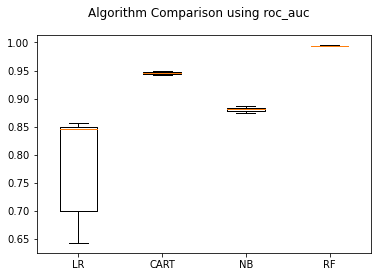

precision

 n_splits 10 random_state 12345
LR: 0.759441 (0.072120)

 n_splits 10 random_state 12345
CART: 0.954173 (0.003069)

 n_splits 10 random_state 12345
NB: 0.841007 (0.004405)

 n_splits 10 random_state 12345
RF: 0.957023 (0.001764)


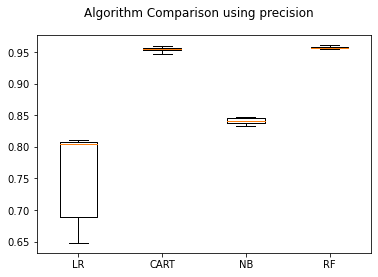

recall

 n_splits 10 random_state 12345
LR: 0.795546 (0.011696)

 n_splits 10 random_state 12345
CART: 0.951562 (0.002233)

 n_splits 10 random_state 12345
NB: 0.814994 (0.006662)

 n_splits 10 random_state 12345
RF: 0.979670 (0.001494)


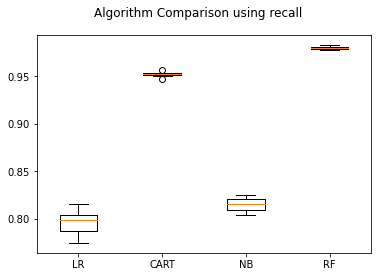

In [16]:
random_state = 12345; n_splits = 10
compare_models(n_splits, random_state, X, y)

### Observations

As we know, *Recall*, the ability of a classification model to identify all data points in a relevant class is very important to us. 

Based on the above comparison chart, we observe that both Decision Tree (CART) and Random Forest models give better predictions and their recall score is above 95%.

### Let us use Decision Tree model as our Base model

#### Split data into training and test datasets

In [17]:
seed      = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, stratify = y) 

### Build Decision Tree model

In [18]:
clf    = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf    = clf.fit(X_train,y_train)

### Predict the response for train dataset

In [19]:
predicted_train = clf.predict(X_train)


Training Data
[[31517     0]
 [    0 41215]]


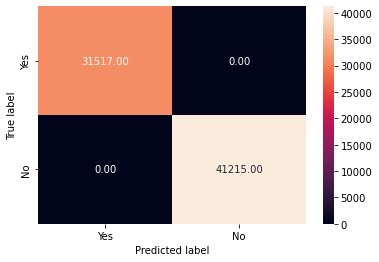

Training Accuracy: 100.000%


In [20]:
matrix             = confusion_matrix(y_train, predicted_train)
print("\nTraining Data")
print(matrix)
draw_cm(y_train, predicted_train)
###     
accuracy_train = clf.score(X_train, y_train) 
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [21]:
measures_train     = classification_report(y_train, predicted_train) 
print("\nTraining data")
print(measures_train) 


Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31517
           1       1.00      1.00      1.00     41215

    accuracy                           1.00     72732
   macro avg       1.00      1.00      1.00     72732
weighted avg       1.00      1.00      1.00     72732



#### Predict the response for test dataset

In [22]:
predicted_testing = clf.predict(X_test)


Testing Data
[[12682   826]
 [  904 16760]]


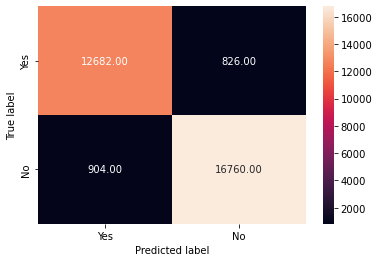

Testing Accuracy: 94.450%


In [23]:
matrix             = confusion_matrix(y_test, predicted_testing)
print("\nTesting Data")
print(matrix)
draw_cm(y_test, predicted_testing )
    
accuracy_train = clf.score(X_test, y_test) 
print("Testing Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [24]:
measures_test     = classification_report(y_test, predicted_testing) 
print("\nTraining data")
print(measures_test) 


Training data
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     13508
           1       0.95      0.95      0.95     17664

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



### Observations

We observe that the performance measures for both training data and test data are in the same range ruling out **Model Overfit**

### Get insights from the model

Feature importance scores can provide insight into the model. Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.

Ref: https://machinelearningmastery.com/calculate-feature-importance-with-python/

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

In [25]:
flist     = X.columns
classlist = ['Satisfied', 'Not Satisfied']

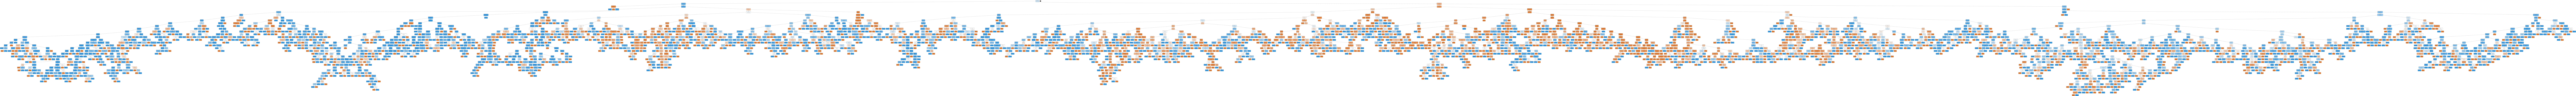

In [26]:
### Plot a tree
draw_decision_tree(clf, X_train, y_train, flist, classlist, file_name = 'Tree')

#### Pruning the tree

In [27]:
clf1    = DecisionTreeClassifier(max_depth = 4, random_state = 12345).fit(X_train,y_train)

"""

DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)

"""

"\n\nDecisionTreeClassifier(\n    *,\n    criterion='gini',\n    splitter='best',\n    max_depth=None,\n    min_samples_split=2,\n    min_samples_leaf=1,\n    min_weight_fraction_leaf=0.0,\n    max_features=None,\n    random_state=None,\n    max_leaf_nodes=None,\n    min_impurity_decrease=0.0,\n    class_weight=None,\n    ccp_alpha=0.0,\n)\n\n"

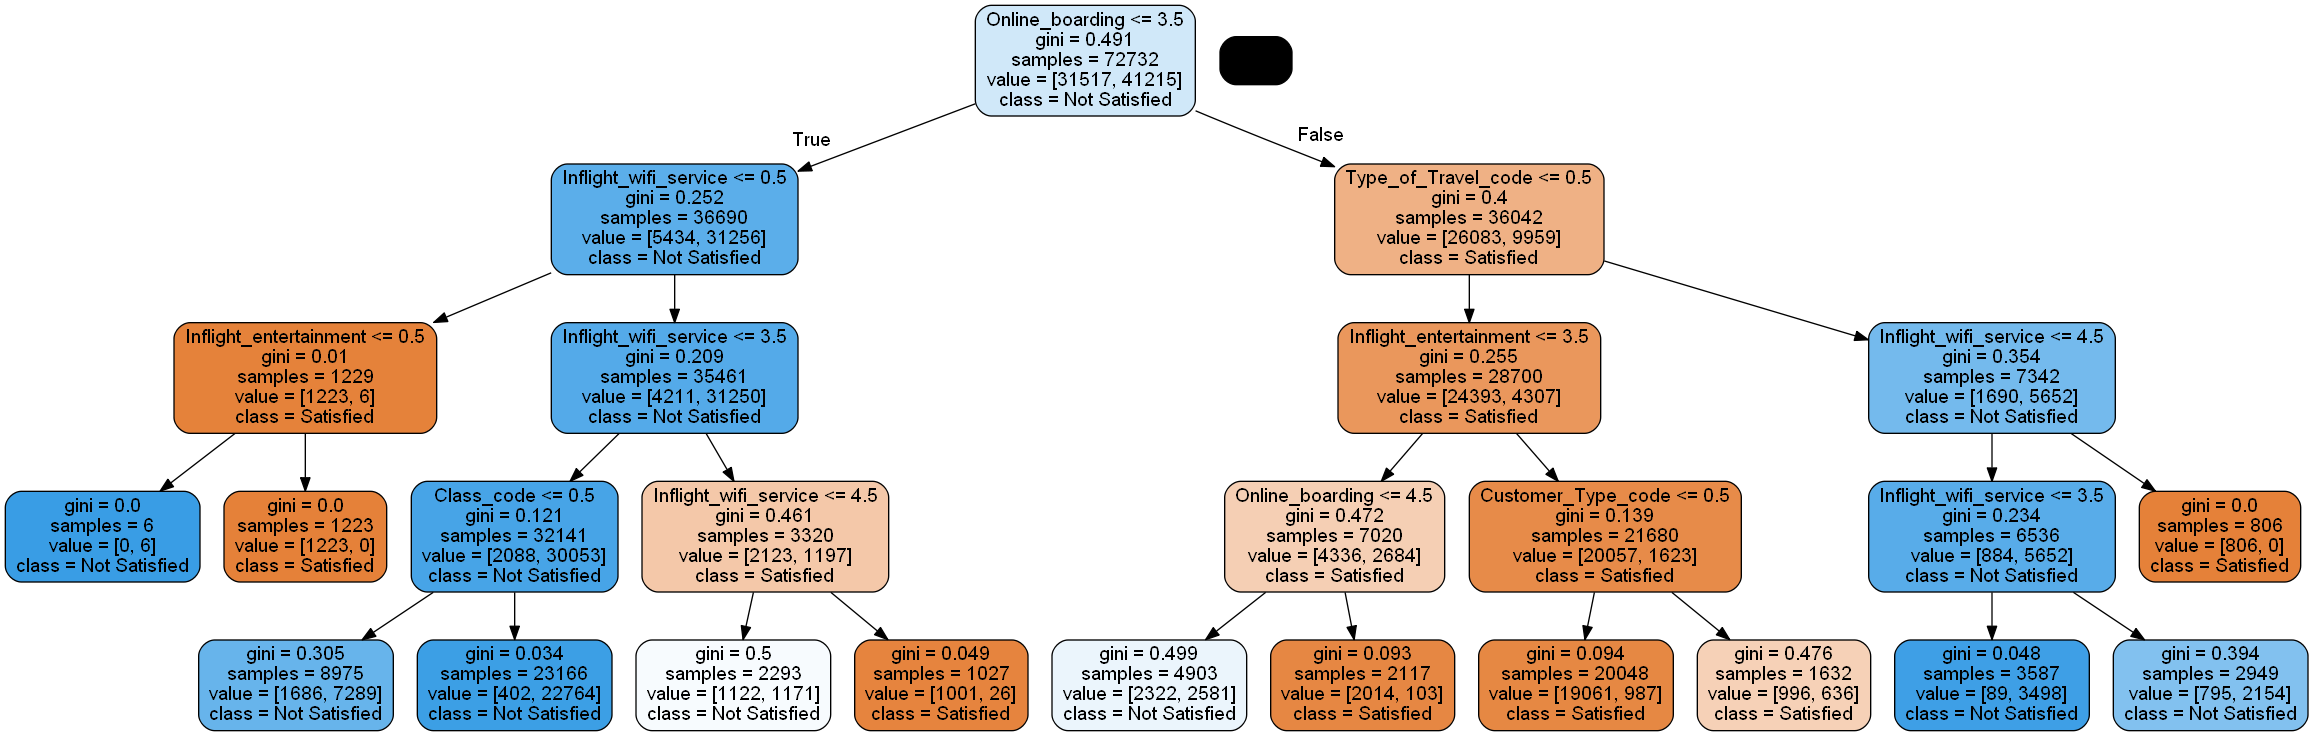

In [28]:
#  Plot a Pruned tree
draw_decision_tree(clf1, X_train, y_train, flist, classlist, file_name = 'Tree')

In [29]:
tree_to_rules(clf1, flist, classlist)

 if ( Online_boarding <= 3.5 ) {
   if ( Inflight_wifi_service <= 0.5 ) {
     if ( Inflight_entertainment <= 0.5 ) {
       Class = Not Satisfied
     } else {
       Class = Satisfied
     }
   } else {
     if ( Inflight_wifi_service <= 3.5 ) {
       if ( Class_code <= 0.5 ) {
         Class = Not Satisfied
       } else {
         Class = Not Satisfied
       }
     } else {
       if ( Inflight_wifi_service <= 4.5 ) {
         Class = Not Satisfied
       } else {
         Class = Satisfied
       }
     }
   }
 } else {
   if ( Type_of_Travel_code <= 0.5 ) {
     if ( Inflight_entertainment <= 3.5 ) {
       if ( Online_boarding <= 4.5 ) {
         Class = Not Satisfied
       } else {
         Class = Satisfied
       }
     } else {
       if ( Customer_Type_code <= 0.5 ) {
         Class = Satisfied
       } else {
         Class = Satisfied
       }
     }
   } else {
     if ( Inflight_wifi_service <= 4.5 ) {
       if ( Inflight_wifi_service <= 3.5 ) {
         Class = Not

<function matplotlib.pyplot.show(close=None, block=None)>

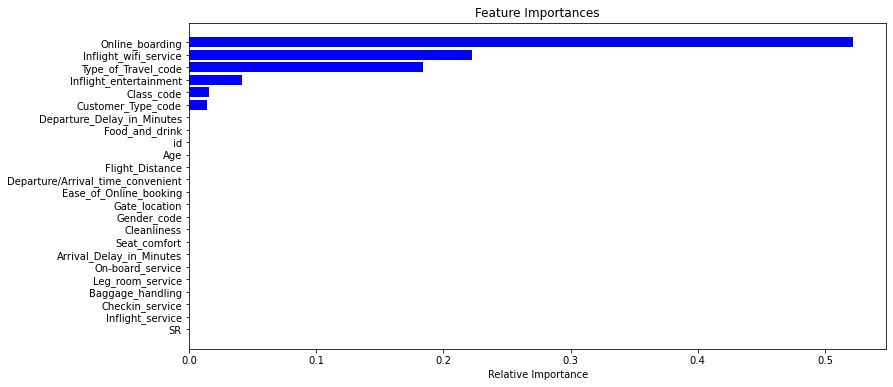

In [30]:
importances = clf1.feature_importances_
indices     = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [flist[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

In [31]:
idf =  pd.DataFrame({'Name' : [flist[i] for i in indices], 'Value' : importances[indices] *100 })

In [32]:
idf.sort_values('Value', ascending = False, inplace = True)
idf.set_index(keys = 'Name', inplace = True)

In [33]:
idf

Value
Name                                        
Online_boarding                    52.212005
Inflight_wifi_service              22.212200
Type_of_Travel_code                18.431993
Inflight_entertainment              4.164180
Class_code                          1.543621
Customer_Type_code                  1.436001
Inflight_service                    0.000000
Departure_Delay_in_Minutes          0.000000
Food_and_drink                      0.000000
id                                  0.000000
Age                                 0.000000
Flight_Distance                     0.000000
SR                                  0.000000
Ease_of_Online_booking              0.000000
Gate_location                       0.000000
Gender_code                         0.000000
Cleanliness                         0.000000
Seat_comfort                        0.000000
Arrival_Delay_in_Minutes            0.000000
On-board_service                    0.000000
Leg_room_service                    0.000000
Baggage_handling                    0.000000
Checkin_service                     0.000000
Departure/Arrival_time_convenient   0.000000

Decision trees (CART) offer importance scores based on the reduction in the criterion used to select split points based on entropy.

## END